<a href="https://colab.research.google.com/github/gursewak-007/Machine-learning/blob/main/Tabular_Playground_Series_May_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 235
!uname -a 

Linux b6481a2ce975 5.4.188+ #1 SMP Sun Apr 24 10:03:06 PDT 2022 x86_64 x86_64 x86_64 GNU/Linux


In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')


#downloading datast

In [2]:
from google.colab import files

In [3]:
! ls

sample_data


In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gursewaksingh01","key":"776f6bbe0f89a0479aa66163b94208db"}'}

In [5]:
! mkdir /root/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c tabular-playground-series-may-2022

! unzip tabular-playground-series-may-2022.zip

 98% 252M/257M [00:02<00:00, 118MB/s] 
100% 257M/257M [00:02<00:00, 123MB/s]
Archive:  tabular-playground-series-may-2022.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


#loading data and preprocessing

In [7]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from tabulate import tabulate

In [8]:
# Reading the raw data
train_raw = pd.read_csv('train.csv')
test_raw = pd.read_csv('test.csv')

In [9]:
train=train_raw.copy()
test=test_raw.copy()

In [10]:
train.drop(['id'],axis=1,inplace=True)
test.drop(['id'],axis=1,inplace=True)

In [11]:
train.shape,test.shape

((900000, 32), (700000, 31))

In [30]:
train.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


In [44]:
print(tabulate(train.head(), headers = 'keys', tablefmt = 'pretty'))

+---+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+------+------+------+------+------+------+------+------+------+------+------+------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+------------+---------------------+------+------+--------+
|   |        f_00         |        f_01         |        f_02         |        f_03         |        f_04         |        f_05         |        f_06         | f_07 | f_08 | f_09 | f_10 | f_11 | f_12 | f_13 | f_14 | f_15 | f_16 | f_17 | f_18 |        f_19         |        f_20         |        f_21         |        f_22         |        f_23         |        f_24         |        f_25         |        f_26         |    f_27    |        f_28         | f_29 | f_30 | target |
+---+---------------------+-----------------

In [32]:
print(tabulate(test.head(), headers = 'keys', tablefmt = 'pretty'))

+---+--------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+------+------+------+------+------+------+------+------+------+------+------+------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+--------------------+------------+--------------------+------+------+
|   |   id   |        f_00         |        f_01         |        f_02         |        f_03         |        f_04         |        f_05         |        f_06         | f_07 | f_08 | f_09 | f_10 | f_11 | f_12 | f_13 | f_14 | f_15 | f_16 | f_17 | f_18 |        f_19         |        f_20         |        f_21         |        f_22         |        f_23         |        f_24         |        f_25         |        f_26        |    f_27    |        f_28        | f_29 | f_30 |
+---+--------+---------------------+------------

In [11]:
def count_chars(df, field):
    '''
    Describes something...
    '''
    
    for i in range(10):
        df[f'ch_{i}'] = df[field].str.get(i).apply(ord) - ord('A')
        
    df["unique_characters"] = df[field].apply(lambda s: len(set(s)))
    return df

In [12]:
train = count_chars(train, 'f_27')
test = count_chars(test, 'f_27')

In [47]:
print(tabulate(train.head(), headers = 'keys', tablefmt = 'pretty'))


+---+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+------+------+------+------+------+------+------+------+------+------+------+------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+------------+---------------------+------+------+--------+------+------+------+------+------+------+------+------+------+------+-------------------+
|   |        f_00         |        f_01         |        f_02         |        f_03         |        f_04         |        f_05         |        f_06         | f_07 | f_08 | f_09 | f_10 | f_11 | f_12 | f_13 | f_14 | f_15 | f_16 | f_17 | f_18 |        f_19         |        f_20         |        f_21         |        f_22         |        f_23         |        f_24         |        f_25         |        f_26         |    f_27    |

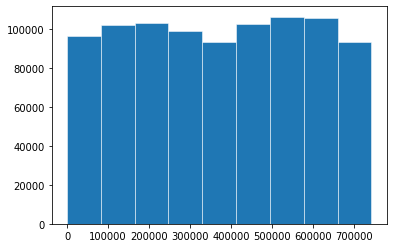

In [75]:
ax=plt.subplot()
ax.hist(train['f27_cat'], bins=9, linewidth=0.5, edgecolor="white")
# ax.set(xlim=(28,30), xticks=np.arange(28,30))
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
f=[]
for i in range(19,29):
  if i !=27:
    f.append(f'f_{i}')

In [15]:
ss=StandardScaler()
train[f]=ss.fit_transform(train[f])
test[f]=ss.fit_transform(test[f])


In [16]:
train['f_27'] = train['f_27'].astype('category')
train["f27_cat"] = train['f_27'].cat.codes
train.drop(['f_27'],axis=1,inplace=True)

In [17]:
test['f_27'] = test['f_27'].astype('category')
test["f27_cat"] = test['f_27'].cat.codes
test.drop(['f_27'],axis=1,inplace=True)

In [54]:
# train['f_mean'] = train.mean(axis=1)
# train['f_std'] = train.std(axis=1)
# train['f_iqr'] = scipy.stats.iqr(train, axis=1)
# train['f_sm'] = np.nan_to_num(train['f_std'] / 
#                                         train['f_mean'].abs()).clip(-1e30, 1e30)
# train['f_kurtosis'] = scipy.stats.kurtosis(train, axis=1)
# test['f_mean'] = test.mean(axis=1)
# test['f_std'] = test.std(axis=1)
# test['f_iqr'] = scipy.stats.iqr(test, axis=1)
# test['f_sm'] = np.nan_to_num(test['f_std'] / 
#                                         test['f_mean'].abs()).clip(-1e30, 1e30)
# test['f_kurtosis'] = scipy.stats.kurtosis(test, axis=1)

##split and scale train

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [19]:
df=train.copy()

In [20]:
x = df.drop(['target'], axis=1)
# y=df['target']
y = pd.get_dummies(df['target']).values
#split the features and labels into  train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
#rescale the data to be robust to outliers
# scaler = RobustScaler()
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#building model and predicting

In [21]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Dropout
from keras import backend as K
import joblib
from sklearn.metrics import classification_report


In [47]:
class Callback(tf.keras.callbacks.Callback):
    SHOW_NUMBER = 100
    epoch = 1
    def __init__(self, threshold):
        super(Callback, self).__init__()
        self.threshold = threshold
        
    def on_epoch_begin(self, epoch, logs=None):
        self.epoch = epoch

#     def on_train_batch_end(self, batch, logs=None):
    def on_epoch_end(self, epoch, logs=None):
        val_acc = logs["val_auc"]
        if val_acc >= self.threshold:
            print('Epoch: ' + str(epoch) + ' loss: ' + str(logs['loss'])+' accuracy: ' + str(logs['auc'])+' val_accuracy: ' + str(logs['val_auc']))
            self.model.stop_training = True
        if epoch%self.SHOW_NUMBER==0 or self.epoch == 1 or self.epoch == 4999:
            print('Epoch: ' + str(epoch) + ' loss: ' + str(logs['loss'])+' accuracy: ' + str(logs['auc'])+' val_accuracy: ' + str(logs['val_auc']))
#             print('Epoch: ' + str(self.epoch) + ' loss: ' + str(logs['loss'])+' accuracy: ' + str(logs['accuracy']))


In [27]:
x_train.shape

(720000, 42)

In [28]:
model=Sequential([
    Dense(400,input_shape=(42,),activation="relu"),
    Dense(400,activation='relu'),
    Dropout(0.5),
    Dense(200,activation='relu'),
    Dense(2,activation='sigmoid'),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 400)               17200     
                                                                 
 dense_5 (Dense)             (None, 400)               160400    
                                                                 
 dropout_1 (Dropout)         (None, 400)               0         
                                                                 
 dense_6 (Dense)             (None, 200)               80200     
                                                                 
 dense_7 (Dense)             (None, 2)                 402       
                                                                 
Total params: 258,202
Trainable params: 258,202
Non-trainable params: 0
_________________________________________________________________


In [48]:
my_callback = Callback(threshold=0.97)
# call_back = tf.keras.callbacks.ModelCheckpoint("Model.h5", monitor='val_auc',verbose=1,save_best_only=True)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1,momentum=0.1),loss='log_cosh',metrics='AUC')

In [49]:
with tf.device('/device:GPU:0'):
  model.fit(x_train,y_train,batch_size=10240,epochs=1000,validation_split=0.2,verbose=0,callbacks=[my_callback])

Epoch: 0 loss: 0.033375613391399384 accuracy: 0.9600768089294434 val_accuracy: 0.9607856869697571
Epoch: 1 loss: 0.033196788281202316 accuracy: 0.9603650569915771 val_accuracy: 0.961118221282959
Epoch: 100 loss: 0.0319744348526001 accuracy: 0.9628826379776001 val_accuracy: 0.9637573957443237
Epoch: 200 loss: 0.029305249452590942 accuracy: 0.9676250219345093 val_accuracy: 0.9675472974777222
Epoch: 229 loss: 0.02933499775826931 accuracy: 0.9675798416137695 val_accuracy: 0.9701541662216187


In [53]:
joblib.dump(model,'new92.pkl')
files.download('new92.pkl')


INFO:tensorflow:Assets written to: ram://f61f7e5f-d55b-4a24-a180-e716daf30248/assets


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
pred=model.predict(x_test)

In [50]:
with tf.device('/device:GPU:0'):
  model.evaluate(x_test,y_test)

5625/5625 [==============================] - 20s 3ms/step - loss: 0.0280 - auc: 0.9698


In [52]:
print(classification_report(np.argmax(y_test,axis=1),np.argmax(pred,axis=1)))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92     92452
           1       0.93      0.90      0.92     87548

    accuracy                           0.92    180000
   macro avg       0.92      0.92      0.92    180000
weighted avg       0.92      0.92      0.92    180000



In [ ]:
model=joblib.load('new8898.pkl')

In [ ]:
!ls

kaggle.json  sample_submission.csv		     train.csv
new8898.pkl  tabular-playground-series-may-2022.zip
sample_data  test.csv


In [ ]:
display(np.argmax(y_test,axis=1))

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
display(np.argmax(pred,axis=1))

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1])

##xgboost

In [ ]:
import xgboost
r=xgboost.XGBClassifier(learning_rate=0.05, max_depth=10, min_child_weight=4,
             n_estimator=500)

In [ ]:
r.fit(x_train,y_train)

XGBClassifier(learning_rate=0.05, max_depth=10, min_child_weight=4,
              n_estimator=500)

In [ ]:
rpred=r.predict(x_test)

##predicting for test dataset 

In [ ]:
scaler.fit(test)
test0 = scaler.transform(test)

In [ ]:
pred0=model.predict(test0)

In [ ]:
pred0=np.argmax(pred0,axis=1)

In [ ]:
#Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(pred0)
sub_train=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_train['id'],pred],axis=1)
datasets.columns=['id','target']
datasets.to_csv('sample_submission.csv',index=False)

In [ ]:
! kaggle competitions submit -c tabular-playground-series-may-2022 -f sample_submission.csv -m "Message"

100% 6.58M/6.58M [00:01<00:00, 5.87MB/s]
Successfully submitted to Tabular Playground Series - May 2022

In [ ]:
files.download('sample_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>